### A function to make a prediction using a Linear regression model, that is a Python function as follows.
##### - Use Fast API to create an API endpoint

In [54]:
!pip install fastapi

In [55]:
!pip install uvicorn

In [56]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [57]:
studf = pd.read_csv('/Data/wikipedia_cost_of_living_indices3.csv')
studf.head()

,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,Barbados,76.6,19.0,48.9,80.8,69.4,43.5


In [58]:
# Checking missing values
studf.isnull().sum()

Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64

In [59]:
studf.columns

Index(['Country', 'Cost of Living Index', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index'],
      dtype='object')

In [60]:
# Exploring the dataset
studf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         121 non-null    object 
 1   Cost of Living Index            121 non-null    float64
 2   Rent Index                      121 non-null    float64
 3   Cost of Living Plus Rent Index  121 non-null    float64
 4   Groceries Index                 121 non-null    float64
 5   Restaurant Price Index          121 non-null    float64
 6   Local Purchasing Power Index    121 non-null    float64
dtypes: float64(6), object(1)
memory usage: 6.7+ KB


In [61]:
# Summary of data statistics
studf.describe()

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,43.555372,16.052893,30.357851,44.228926,36.471074,65.094215
std,16.147574,11.412267,13.263721,17.055109,18.258110,39.569094
min,18.800000,2.400000,11.100000,17.500000,12.800000,2.300000
25%,30.200000,8.500000,19.800000,31.600000,21.600000,34.800000
50%,39.500000,12.400000,27.000000,40.500000,33.100000,50.600000
75%,52.800000,20.100000,37.000000,53.700000,47.200000,99.400000
max,101.100000,67.200000,74.900000,109.100000,97.000000,182.500000


<Figure size 1200x800 with 0 Axes>

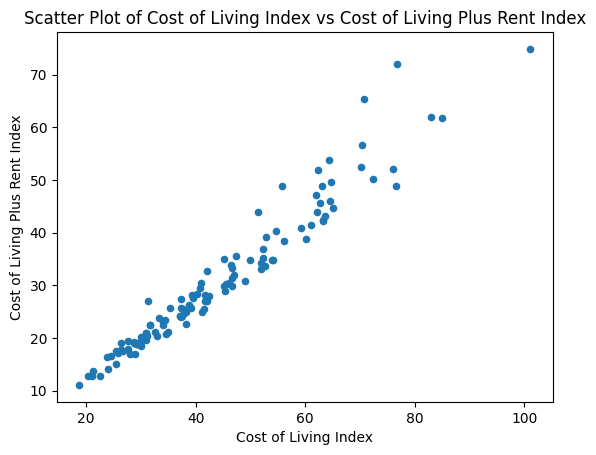

In [62]:
# Visualising the data
plt.figure(figsize=(12, 8))
# plt.scatter(studf['Cost of Living Index'], studf['Cost of Living Plus Rent Index'])
studf.plot(kind='scatter', x='Cost of Living Index', y='Cost of Living Plus Rent Index')
plt.title('Scatter Plot of Cost of Living Index vs Cost of Living Plus Rent Index')
plt.show()

In [63]:
index = studf.select_dtypes(exclude = ['object'])
print(index.columns)

Index(['Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index',
       'Groceries Index', 'Restaurant Price Index',
       'Local Purchasing Power Index'],
      dtype='object')


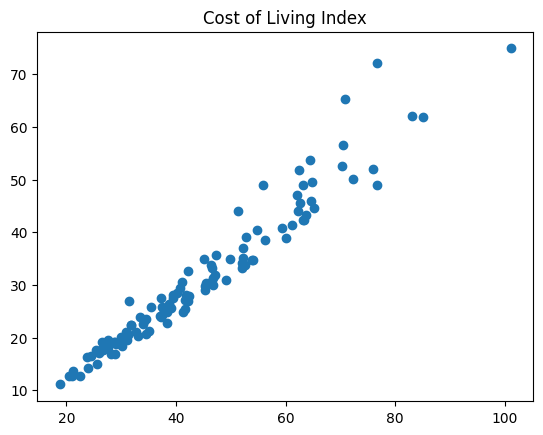

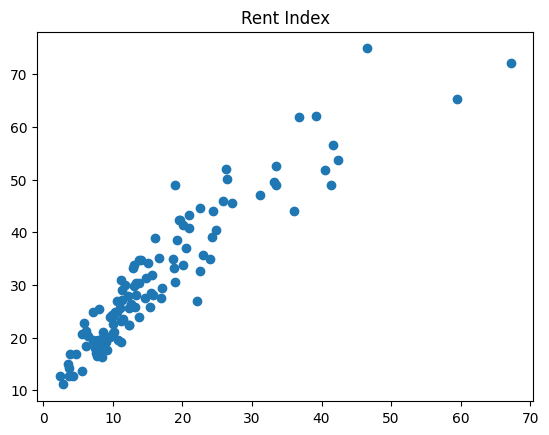

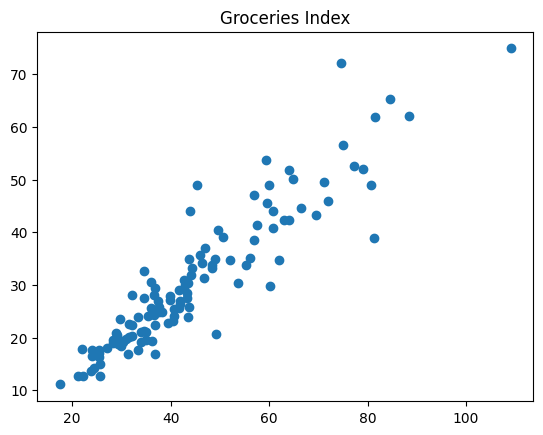

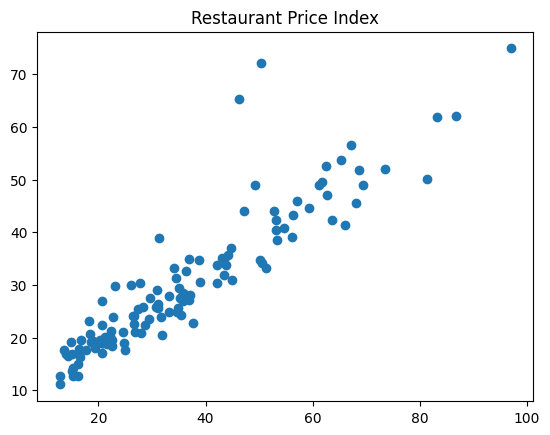

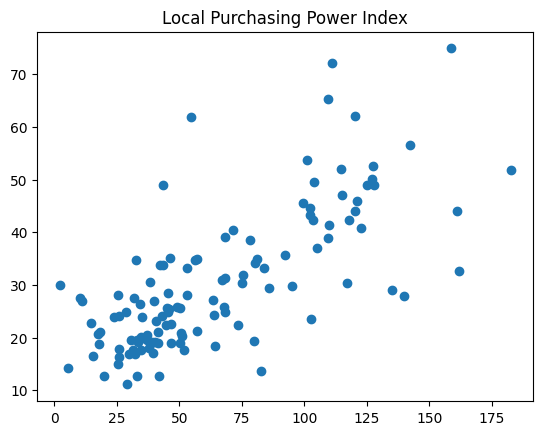

In [64]:
for x in index:
    if x != 'Cost of Living Plus Rent Index':
        plt.scatter(studf[x],studf['Cost of Living Plus Rent Index'])
        plt.title(x)
        plt.show()


In [65]:
non_numeric_cols = studf.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)

# Dropping the non-numeric columns
studf = studf.drop('Country', axis=1)

Non-numeric columns: Index(['Country'], dtype='object')


In [66]:
studf.corr()['Cost of Living Plus Rent Index']


Cost of Living Index              0.971780
Rent Index                        0.932425
Cost of Living Plus Rent Index    1.000000
Groceries Index                   0.924935
Restaurant Price Index            0.913618
Local Purchasing Power Index      0.720701
Name: Cost of Living Plus Rent Index, dtype: float64

In [67]:
studf = studf.drop('Cost of Living Index', axis=1)
# studf = studf.drop('Restaurant Price Index', axis=1)

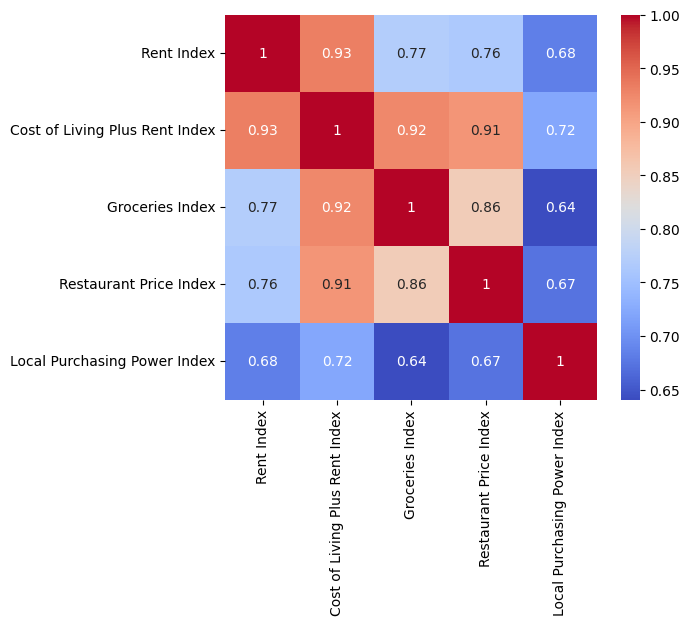

In [68]:
corr_matrix = studf.corr()

# Create the correlation heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [69]:
# Splitting the dataset
# X = studf[['Cost of Living Index', 'Rent Index', 'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index']]
X = studf.drop('Cost of Living Plus Rent Index', axis=1)
# X = studf[['Cost of Living Index', 'Rent Index', 'Local Purchasing Power Index']]
y = studf['Cost of Living Plus Rent Index']


In [70]:
# training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# X_train.shape, y_train.shape

In [71]:
# Training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [72]:
# Evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error( y_pred, y_test)
mean_abs_err = mean_absolute_error(y_test, y_pred)

model_score = model.score(X_test, y_test)


print('Model Score: ', model_score)
print('Mean Squared Error: ', mse)
print('Mean Absolute Error: ', mean_abs_err)
# y_pred.shape

Model Score:  0.9895969786489318
Mean Squared Error:  1.807741151097583
Mean Absolute Error:  1.0265890298841123


In [73]:
output = pd.DataFrame({'actual':y_test,'predicted':y_pred})
output.head()

,actual,predicted
44,33.8,34.758548
47,29.0,25.875894
4,48.9,47.856179
55,25.5,23.184983
26,48.9,47.007972


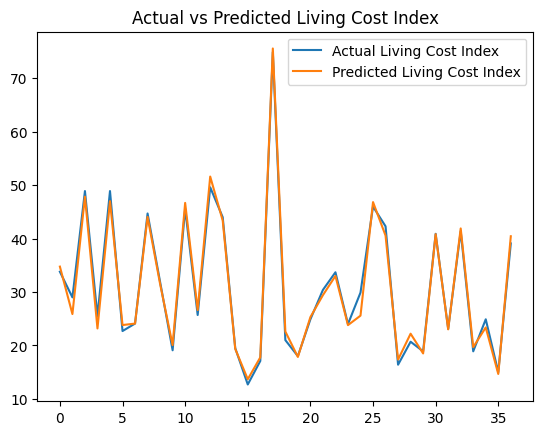

In [74]:
y_test_sale = y_test.values.flatten()

plt.plot(y_test_sale, label='Actual Living Cost Index')
plt.plot(y_pred, label='Predicted Living Cost Index')
plt.title('Actual vs Predicted Living Cost Index')
plt.legend()
plt.show()

In [75]:
# Saving the trained model
joblib.dump(model, 'multivariate_model.joblib')

['multivariate_model.joblib']